In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import SteamVariables as sv

dt = pd.read_csv(sv.CSV_PATH, nrows=900000) # nrows=2000000
pd.set_option('display.max_columns', None)
#Dominio: Reviews da Steam
#Tamanho: 2000000
# --------------------Descricao das colunas--------------------
#! app_id - ID do jogo, Discrete
#! app_name - Nome do jogo, Nominal
#! review_id - ID da review, Discrete
#! language - Linguagem da review, Nominal
#! review - Texto da review, Nominal
#! timestamp_created - Data de criacao da review, Discrete
#* timestamp_updated - Data de atualizacao da review, Discrete
#* recommended - Recomendado ou nao, Discrete
#* votes_helpful - Votos de utilidade, Discrete
#* votes_funny - Votos de humor, Discrete
#* weighted_vote_score - Ranking baseado no número de helpful votes, Continuous
#* comment_count - Numero de comentarios, Discrete
#* steam_purchase - Comprado na Steam, Discrete
#* received_for_free - Recebido de graça, Discrete
#? written_during_early_access - Escrito durante o Early Access, Discrete
#? author.steamid - ID do autor, Discrete
#? author.num_games_owned - Numero de jogos do autor, Discrete
#? author.num_reviews - Numero de reviews do autor, Discrete
#? author.playtime_forever - Tempo de jogo total do autor, Continuous
#? author.playtime_last_two_weeks - Tempo de jogo nas ultimas duas semanas do autor, Continuous
#? author.last_played - Ultima vez que o autor jogou, Discrete
# --------------------Descricao das colunas--------------------

languages = ["bulgarian", "croatian", "danish", "czech", "slovak", "slovenian", "slovak", "slovenian", 
"spanish", "estonian", "finnish", "french", "greek", "hungarian", "irish", "italian", 
"latvian", "lithuanian", "maltese", "dutch", "polish", "portuguese", "romanian", "swedish", "english", "brazilian"]

# Eliminar linhas com linguagem diferente das selecionadas
new_dt = dt[dt[sv.LANGUAGE].isin(languages)]

# Eliminar colunas desnecessarias
new_dt.drop(["Unnamed: 0"], axis=1, inplace=True)
new_dt.drop([sv.STEAM_PURCHASE], axis=1, inplace=True)
new_dt.drop([sv.WRITTEN_DURING_EARLY_ACCESS], axis=1, inplace=True)

# Resetar index
new_dt.reset_index(drop=True, inplace=True)

# Eliminar linhas com valores nulos
new_dt.dropna(inplace=True)

# Print the top 5 games
print(pd.Series(new_dt.index,index=new_dt[sv.APP_NAME]).drop_duplicates())
print(pd.DataFrame(new_dt.columns))

C:\Users\Miguel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


app_name
The Witcher 3: Wild Hunt         0
The Witcher 3: Wild Hunt         1
The Witcher 3: Wild Hunt         2
The Witcher 3: Wild Hunt         3
The Witcher 3: Wild Hunt         4
                             ...  
Portal 2                    503425
Portal 2                    503426
Portal 2                    503427
Portal 2                    503428
Portal 2                    503429
Length: 500973, dtype: int64
                                 0
0                           app_id
1                         app_name
2                        review_id
3                         language
4                           review
5                timestamp_created
6                timestamp_updated
7                      recommended
8                    votes_helpful
9                      votes_funny
10             weighted_vote_score
11                   comment_count
12               received_for_free
13                  author.steamid
14          author.num_games_owned
15              a

C:\Users\Miguel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


: 

C:\Users\Miguel\AppData\Local\Temp/ipykernel_24636/3286473675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dt["review_char_count"] = new_dt["review"].apply(len)


[Text(0, 0, 'The Witcher 3: Wild Hunt'),
 Text(1, 0, 'Half-Life'),
 Text(2, 0, 'Counter-Strike: Source'),
 Text(3, 0, 'Half-Life 2: Episode Two'),
 Text(4, 0, 'Portal 2')]

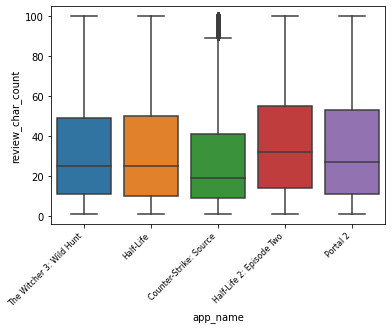

In [21]:

#!Aplica a função length nas reviews de um dado jogo
new_dt["review_char_count"] = new_dt["review"].apply(len)

#!Cria um subdataset com um limite de 100 caracteres
steam_data_subset = new_dt[new_dt["review_char_count"] <= 100]

ax = sns.boxplot(x="app_name", y="review_char_count", data=steam_data_subset)

#! Apenas muda as labels no eixo do x para serem mais legiveis
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=8)

#! Utililidade disto?
#! 0 !#


C:\Users\Miguel\AppData\Local\Temp/ipykernel_24636/3071671840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dt["review_char_count"] = new_dt["review"].apply(len)


<AxesSubplot:xlabel='app_name', ylabel='review_char_count'>

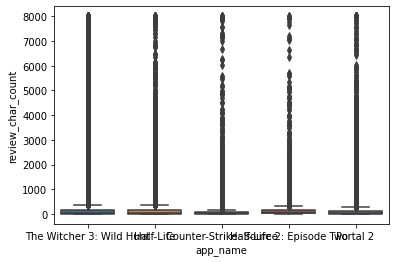

In [22]:

##!Se não fosse limitado: o numero de caracteres por comentario
new_dt["review_char_count"] = new_dt["review"].apply(len)
sns.boxplot(x="app_name", y="review_char_count", data=new_dt)

In [6]:
#!Linear Transformation
new_dt['total_votes'] = (new_dt[sv.VOTES_HELPFUL] * 5 )/ (new_dt[sv.VOTES_HELPFUL].max())
print(new_dt['total_votes'].mean())


0.0008454942221066751


C:\Users\Miguel\AppData\Local\Temp/ipykernel_2312/2983994949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dt['total_votes'] = (new_dt[sv.VOTES_HELPFUL] * 5 )/ (new_dt[sv.VOTES_HELPFUL].max())


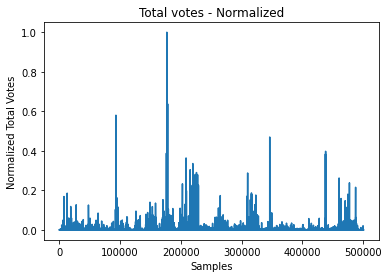

In [17]:
#!Normalization of total votes
myScalerMinMaxScaler = MinMaxScaler()
normalizedColumn = myScalerMinMaxScaler.fit_transform(new_dt[['total_votes']].values)
# Plot the histogram of the normalized feature
plt.plot(normalizedColumn)
plt.title("Total votes - Normalized")
plt.xlabel('Samples')
plt.ylabel('Normalized Total Votes')
plt.show()





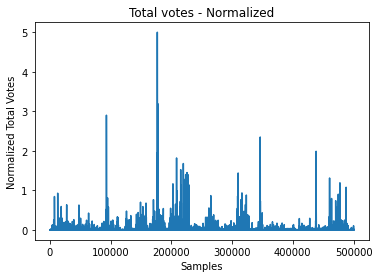

In [18]:

plt.plot(new_dt[['total_votes']].values)
plt.title("Total votes - Normalized")
plt.xlabel('Samples')
plt.ylabel('Normalized Total Votes')
plt.show()